In [1]:
class TextProcessor:
    def __init__(self):
        self.dict_cho   = {0:u"ᄀ",  1:u"ᄁ",  2:u"ᄂ",  3:u"ᄃ",  4:u"ᄄ",  5:u"ᄅ",  6:u"ᄆ",  7:u"ᄇ",  8:u"ᄈ",  9:u"ᄉ",
            10:u"ᄊ", 11:u"ᄋ", 12:u"ᄌ", 13:u"ᄍ", 14:u"ᄎ", 15:u"ᄏ", 16:u"ᄐ", 17:u"ᄑ", 18:u"ᄒ"}
        self.dict_jung  = {0:u"ㅏ",  1:u"ㅐ",  2:u"ㅑ",  3:u"ㅒ",  4:u"ㅓ",  5:u"ㅔ",  6:u"ㅕ",  7:u"ㅖ",  8:u"ㅗ",  9:u"ㅘ",
            10:u"ㅙ", 11:u"ㅚ", 12:u"ㅛ", 13:u"ㅜ", 14:u"ㅝ", 15:u"ㅞ", 16:u"ㅟ", 17:u"ㅠ", 18:u"ㅡ", 19:u"ㅢ", 20:u"ㅣ"}
        self.dict_jong  = { 0:u" ",   1:u"ᆨ",  2:u"ᆩ",  3:u"ᆪ",  4:u"ᆫ",  5:u"ᆬ",  6:u"ᆭ",  7:u"ᆮ",  8:u"ᆯ",  9:u"ᆰ",  
            10:u"ᆱ", 11:u"ᆲ", 12:u"ᆳ", 13:u"ᆴ", 14:u"ᆵ", 15:u"ᆶ", 16:u"ᆷ", 17:u"ᆸ", 18:u"ᆹ", 19:u"ᆺ", 
            20:u"ᆻ", 21:u"ᆼ", 22:u"ᆽ", 23:u"ᆾ", 24:u"ᆿ", 25:u"ᇀ", 26:u"ᇁ", 27:u"ᇂ"}

    def __call__(self, text: str) -> list:
        cjj = ""
        prefix = ""
        for unicode in text:
            enc = unicode.encode()
            if len(enc) == 3:   # 한글 자모
                h___ = enc[0]-224
                _h__ = (enc[1]-128) // 4
                next_ = (enc[1]-128) % 4
                __h_ = (next_*64 + enc[2]-128) // 16
                ___h = (next_*64 + enc[2]-128) % 16
                hex = h___ * 4096 + _h__ * 256 + __h_ * 16 + ___h
    
                if hex < 44032:
                    raise Exception(f"Invalid text ({unicode}) ({text})")
                cho  = self.dict_cho[(hex - 44032) // 588]
                jung = self.dict_jung[((hex - 44032) % 588) // 28]
                jong  = self.dict_jong[((hex - 44032) % 588) % 28]
                if jong == u" ": cjj = f"{cjj}{prefix}{cho}{jung}"    # 종성 없는 경우
                else : cjj = f"{cjj}{prefix}{cho}{jung}{jong}"        # 종성 있는 경우
                prefix = ""
            else:   # 문장부호
                if unicode not in [" "]:   # 문장 부호도 아닌 경우 에러 출력
                    raise Exception(f"Invalid text ({unicode}) ({text})")
                prefix = " "
        return cjj
tp = TextProcessor()

In [8]:
from tqdm.notebook import tqdm
import re
 
with open("/home/shahn/Datasets/KoreanASR/train/text", "r", encoding='utf-8') as f:
    lines = f.readlines()
with open("/home/shahn/Documents/icefall_github/egs/ksponspeech/ASR/data/lang_bpe_500/transcript_words_cjj.txt", "w", encoding='utf-8') as f:
    for line in tqdm(lines):
        try:
            text = re.match("[^\s]+ (.+)", line).groups()[0]
            text = re.sub("['\" .,?!…‘’]+", " ", text).strip()
        except:
            tqdm.write(f"<{line.rstrip()}>")
            continue
        try:
            text_cjj = tp(text)
        except:
            tqdm.write(f"[{text}]")
            continue
        f.write(f"{text_cjj}\n")

  0%|          | 0/8301964 [00:00<?, ?it/s]

[근데 대부분 다 암 치료하는 환자들이 구십 몇 % 다 보니까 많이 아프신 분들 밖에 안 온단 말이야]
[근데 내가 너를 데리고 왔어 그럼 니가 파는 폰 파는 거에 대해서 %율을 달마다 받아]
[일을 그만뒀는데도 내가 폰을 팔았으니까 그 %율이 계속 들어와 달마다]
[그리고 너가 누굴 데리고 오잖아 그럼 그 %를 너도 받고 나도 받아 왜냐면 내가 데려온 애고]
[우대 몇 % 해주는데 여기는]
[그냥 뭔가 약간 그 불닭만의 감칠맛이 있잖아 근데 그게 안 느껴져 어 짜증 나는데 맛있다고 근데 또 약간 불닭 맛이 나긴 하는데 불닭에서 약간 몇 % 부족한 느낌이야]
[마이너스가 엄청나게 때려져면 거의 천 오백이 백 됐으니까 마이너스 몇 %냐 그게]
[트위터에서 그래서 막 몇% 돌파 몇% 돌파 뭐 첫째 날 이만큼 할 수 있는데 돌파 막 이렇게 꼐속 떴 떴었단 말이야]
[ㅊ]
[파티 하는거 동영상 찍어줘 ㅍ]
[고모랑 영상 통화해 줘 ㅍ]
[ㅊ]
[이번 주 가위 말고 챙겨야 할 것 있어 ㅋ]
[장화 필요하지 ㅊ]
[어떤 디즈니 동화 가지고 있어 ㅡ]
[이거 강도 두번째로 할 거야 ㅊ]
[이쁜 ㅇㅇ이 사진 찍어 주세요]
[재미잼 ㄱ있어 또 볼래]
[친구랑 싸워서 슬펐어 ㅐㅐ]
[콩나ㅜㄹ 들어가 있는거 맞는 거지]
[이쁜 ㅇㅇ이 사진 찍어 주세요]
[다시 비디오 찍고 싶어 ㅍ]
[저 집에 왔어요 ㅍ]
[아빠랑 이번 주에 놀러가기로 해서 기분 좋아 ㅍㅍㅊㅍ]
[키가 크는 운동 알려 줘 ㅍ]
[내일 유치원 행사에서 대표로 발표하는데 너무 떨려요 ㅍ]
[아빠한테 사랑한다고 메세지 보내 줘 ㅍ]
[급한 일 있으면 연락 줘 ㅍ]
[내가 소리치면 엄마한테 바로 연락해 줘 ㅍ]
[다음 시간에는 어디가 숙제야 ㅖ]
[오늘 유치원에서 배울 내용은 어떤 거지 ㅂ]
[이번 주 체육 시간에 뭐 가져오랬지 ㅂ]
[수요일 알림 찾아 줘 ㅂ]
[물감 쓸 때 조심해야 할 거 알려 줘 ㅂ]
[청국장은 콩으로 만든 음식이야 ㅂ]
[그 준비물은 어디서 사는 건데 ㅂ]
[아빠한테 할 얘기 있으니까 전화해줄래 

In [7]:
import unicodedata

s = u'ᄒㅏᆫ'
t = unicodedata.normalize('NFKD', s)
t = unicodedata.normalize('NFD', s)
print(s, t)
s == t

ᄒㅏᆫ ᄒㅏᆫ


True

In [ ]:
'ᄋㅛᆨᄆㅓᆨᄂㅡᆫ ᄀㅓᆺᄃㅗ ᄋㅓᄋㅣᄀㅏ ᄋㅓᆹᄀㅗ ᄀㅡᄅㅐᄉㅓ ᄀㅡᆫᄃㅔ ᄀㅓᄀㅣᄉㅓ ᄋㅑᆨᄀㅏᆫ ᄍㅗᆷ ᄇㅜᄌㅏᆼ ᄉㅓᆫᄉㅐᆼᄂㅣᆷ ᄂㅏᄋㅣ ᄆㅏᆭᄋㅡᆫ ᄃㅓᆼᄎㅣᄃㅗ ᄋㅣᆻᄀㅗ ᄂㅡᆰᄋㅡᄉㅣᆫ ᄇㅜᄌㅏᆼ ᄉㅓᆫᄉㅐᆼᄂㅣᆷᄋㅣ ᄋㅣᆻᄂㅡᆫᄃㅔ ᄃㅡᆮᄃㅏ ᄃㅡᆮᄃㅏ ᄍㅏᄌㅡᆼᄋㅣ ᄂㅏᆻᄂㅡᆫᄌㅣ ᄀㅣᄌㅣᄀㅐᄒㅏᄆㅕᆫᄉㅓ ᄋㅏᄋㅣ  ᄉㅣᄁㅡᄅㅓ ᄋㅣᄅㅓᇂᄀㅔ ᄆㅏᆯᄋㅡᆯ ᄒㅏᆫ ᄀㅓᄋㅑ ᄀㅡᄅㅐᄉㅓ ᄀㅡ ᄒㅏᆨᄇㅜᄆㅗᄃㅗ ᄀㅡᄌㅔᄉㅓᄋㅑ ᄆㅏᆨ ᄂㅜᆫᄎㅣ ᄇㅗᄋㅣᄀㅗ ᄋㅣᄅㅐᄉㅓ ᄃㅏᄅㅡᆫ ᄌㅏᆼᄉㅗᄅㅗ ᄋㅗᆱᄀㅣᄆㅕᆫ ᄋㅏᆫ ᄃㅚᄂㅑᄀㅗ ᄒㅐᄉㅓ ᄉㅏᆼᄃㅏᆷᄉㅣᆯ ᄃㅡᆯᄋㅓᄀㅏᆫ ᄃㅏᆷᄋㅔ ᄄㅗ ᄃㅏᄅㅡᆫ ᄉㅓᆫᄉㅐᆼᄂㅣᆷᄃㅡᆯ ᄋㅓᆹᄋㅡᄂㅣᄁㅏ  ᄀㅓᄀㅣᄉㅓ ᄋㅓᆷᄎㅓᆼ ᄋㅛᆨᄋㅡᆯ ᄒㅏᆫ ᄀㅓᄋㅑ ᄀㅡᄅㅐᄉㅓ ᄀㅕᆯᄅㅗᆫᄋㅡᆫ ᄀㅒᄂㅡᆫ ᄉㅏᄀㅘᄇㅏᆮᄌㅣᄃㅗ ᄆㅗᆺ ᄒㅏᄀㅗ ᄀㅒᄆㅏᆫ ᄉㅏᄀㅘᄒㅏᄀㅗ ᄁㅡᇀᄂㅏᄃㅏ ᄋㅘᆻᄋㅓ'

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
state_dict = torch.load("/home/shahn/Documents/icefall/egs/librispeech/ASR/exp/ko/ipa_do_sl0.5/epoch-97.pt", weights_only=False)["model"]
state_dict['encoder.cnn.0.norm2.running_var']

tensor([8.5627e-04, 2.8541e-03, 8.2163e-04,  ..., 6.8836e-03, 1.5147e-02,
        4.5390e-05], device='cuda:0')

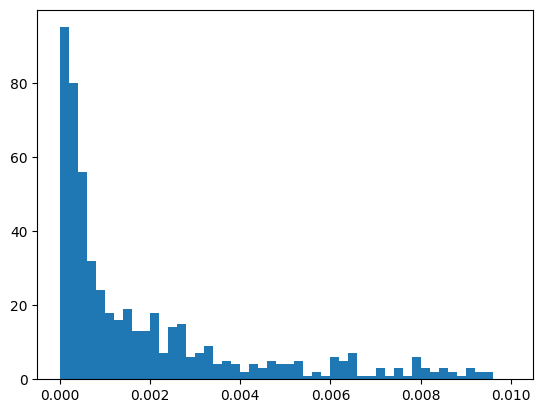

tensor(26.7488, device='cuda:0')

In [16]:
plt.hist(state_dict['encoder.cnn.0.norm2.running_var'].cpu().numpy(), bins=50, range=(0, 0.01))
plt.show()
state_dict['encoder.cnn.0.norm2.running_var'].max()